<a href="https://colab.research.google.com/github/bindukovvada/Loan_Default_Prediction_Assignment/blob/main/Loan_Default_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement :

A person’s creditworthiness is often associated (conversely) with the likelihood they may default on loans. 

We’re giving you anonymized data on about 1000 loan applications, along with a certain set of attributes about the applicant itself, and whether they were considered high risk.

0 = Low credit risk i.e high chance of paying back the loan amount

1 = High credit risk i.e low chance of paying back the loan amount

#Data Description 

The dataset has two files:

1. `applicant.csv`: This file contains personal data about the (primary) applicant
- Unique ID: `applicant_id` (string)
- Other fields:
    - Primary_applicant_age_in_years (numeric)
    - Gender (string)
    - Marital_status (string)
    - Number_of_dependents (numeric)
    - Housing (string)
    - Years_at_current_residence (numeric)
    - Employment_status (string)
    - Has_been_employed_for_at_least (string)
    - Has_been_employed_for_at_most (string)
    - Telephone (string)
    - Foreign_worker (numeric)
    - Savings_account_balance (string)
    - Balance_in_existing_bank_account_(lower_limit_of_bucket) (string)
    - Balance_in_existing_bank_account_(upper_limit_of_bucket) (string)

2. `loan.csv`: This file contains data more specific to the loan application
- Target: `high_risk_application` (numeric)
- Other fields:
    - applicant_id (string)
    - Months_loan_taken_for (numeric)
    - Purpose (string)
    - Principal_loan_amount (numeric)
    - EMI_rate_in_percentage_of_disposable_income (numeric)
    - Property (string)
    - Has_coapplicant (numeric)
    - Has_guarantor (numeric)
    - Other_EMI_plans (string)
    - Number_of_existing_loans_at_this_bank (numeric)
    - Loan_history (string)

##Goal of the Project 

The purpose of this project is to build a machine learning model that can predict whether or not a person is a high risk applicant based on the loan and personal information provided.

#Import all necessary libraries

In [ ]:
#Installing package
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-optimize 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Load the dataset 

In [ ]:
#Connect with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/applicant.csv')
df2 = pd.read_csv('/content/drive/MyDrive/loan.csv')

#Data Inspection

In [ ]:
df1.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [ ]:
df2.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [ ]:
#Merge two datasets
df = pd.merge(df1,df2)

In [ ]:
#Displaying the final dataset
df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [ ]:
#Shape of the dataset
df.shape

(1000, 27)

Observation -

This dataset has 1000 rows and 27 columns

### Display the complete summary of the dataset
df.info() gives the summary of the dataframe including data types, shape and memory storage.

In [ ]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

Observation -

Some coloumns have Null values like Purpose, Property, Savings_account_balance and some more..
Other_EMI_plans have more than 50% of null values.


###Checking the Null Values
The isnull() function returns a specified value if the expression is NULL. If the expression is NOT NULL, this function returns the expression.


In [ ]:
# Checking for NUll Values
df.isna().sum().to_frame().rename(columns={0:'Missing Value '})

,Missing Value
applicant_id,0
Primary_applicant_age_in_years,0
Gender,0
Marital_status,0
Number_of_dependents,0
Housing,0
Years_at_current_residence,0
Employment_status,0
Has_been_employed_for_at_least,62
Has_been_employed_for_at_most,253


Observation - 

Here we can see that there are some null values

If it is numerical, I will replace the null values with mean.
If it is categorical, I will replace the null values with mode.

##Checking Unique Values
The nunique() method returns the number of unique values for each column.

In [ ]:
#checking unique values of each features
df.nunique()

applicant_id                                                1000
Primary_applicant_age_in_years                                53
Gender                                                         2
Marital_status                                                 4
Number_of_dependents                                           2
Housing                                                        3
Years_at_current_residence                                     4
Employment_status                                              4
Has_been_employed_for_at_least                                 4
Has_been_employed_for_at_most                                  4
Telephone                                                      1
Foreign_worker                                                 2
Savings_account_balance                                        4
Balance_in_existing_bank_account_(lower_limit_of_bucket)       2
Balance_in_existing_bank_account_(upper_limit_of_bucket)       2
loan_application_id      

Observation -

We may remove the applicant_id and loan_application_id column because the values in it are all unique.
We can have encode all other categorical columns.

###Checking Duplicates in the dataset

In [ ]:
#Finding Duplicate values
len(df[df.duplicated()])

0

Observation - 

No Duplicates found in this dataset.

###Checking Columns in the dataset

In [ ]:
#checking columns of data
df.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

###Descriptive Statistics

###Checking the statistics of our data like mean, standard deviation and so on..

To learn more about the dataset features, w e're using the df.describe() function, which provides statistical data on all numerical features of our data frame by default.

In [ ]:
df.describe(include='all')

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
count,1.000000e+03,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,938,747,...,988,1.000000e+03,1000.000000,846,1000.000000,1000.000000,186,1000.000000,1000,1000.000000
unique,NaN,NaN,2,4,NaN,3,NaN,4,4,4,...,9,NaN,NaN,3,NaN,NaN,2,NaN,5,NaN
top,NaN,NaN,male,single,NaN,own,NaN,skilled employee / official,1 year,4 years,...,electronic equipment,NaN,NaN,car or other,NaN,NaN,bank,NaN,existing loans paid back duly till now,NaN
freq,NaN,NaN,690,548,NaN,713,NaN,630,339,339,...,280,NaN,NaN,332,NaN,NaN,139,NaN,530,NaN
mean,1.514763e+06,35.546000,NaN,NaN,1.155000,NaN,2.845000,NaN,NaN,NaN,...,NaN,3.271258e+06,2.973000,NaN,0.041000,0.052000,NaN,1.407000,NaN,0.300000
std,2.286764e+05,11.375469,NaN,NaN,0.362086,NaN,1.103718,NaN,NaN,NaN,...,NaN,2.822737e+06,1.118715,NaN,0.198389,0.222138,NaN,0.577654,NaN,0.458487
min,1.105364e+06,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,...,NaN,2.500000e+05,1.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,0.000000
25%,1.321398e+06,27.000000,NaN,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,...,NaN,1.365500e+06,2.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,0.000000
50%,1.529114e+06,33.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN,NaN,...,NaN,2.319500e+06,3.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,0.000000
75%,1.707752e+06,42.000000,NaN,NaN,1.000000,NaN,4.000000,NaN,NaN,NaN,...,NaN,3.972250e+06,4.000000,NaN,0.000000,0.000000,NaN,2.000000,NaN,1.000000


##From the statistical part of our data, we can see:

*   We can observe from the age feature that the oldest insured client is 75 and the youngest is 19. There are several outliers in terms of age distributions.
*   We have a customers employed for a minimum of 1 year and a maximum of 4 years. 
*   Main purpose of this loan is to take a electrical equipment 




#Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

###Assigning target column to a variable

In [ ]:
#Storing target column into a variable 
Dependent_variable = df['high_risk_applicant']

##Let's compare High Risk Applicants to Low Risk Applicants.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


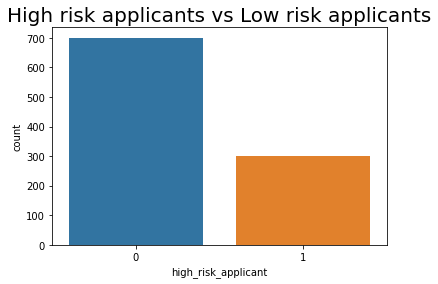

In [ ]:
#Plot the count of the target variable
sns.countplot(df['high_risk_applicant'],data=df)
plt.title('High risk applicants vs Low risk applicants', fontsize=20) #title for the countplot
plt.show()

Observation -

As we can see, our data is imbalanced, thus we must balance it. But first, let's try some techniques and get some important data.

In [ ]:
df.high_risk_applicant.value_counts()/df.shape[0]

0    0.7
1    0.3
Name: high_risk_applicant, dtype: float64

Observation -

The dependant variable has binary values of 0 and 1. We can infer from the plot above that we have more low risk applicants. 
30% percent of the data are 1's and 70% percent of the data are 0s.
This data must be handled using the imbalance technique since the output feature is unbalanced.

##Analyzing responses based on gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


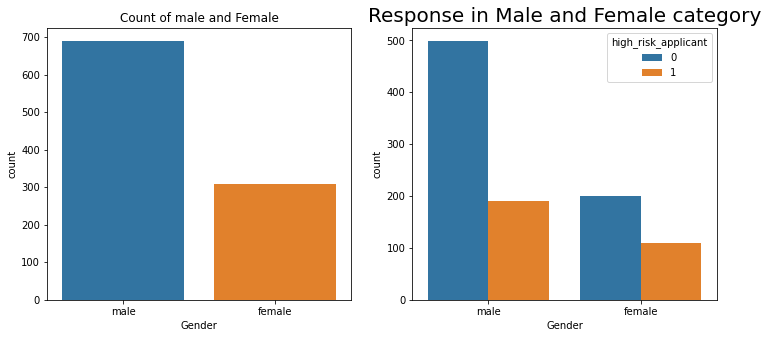

In [ ]:
#Analyzing responses based on gender
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(df['Gender'])
plt.title('Count of male and Female')
plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue= df['high_risk_applicant'])
plt.title('Response in Male and Female category', fontsize=20)
plt.show()

Observation - 

*   There are more male applicants.
*   High-risk applicants are majority male.

##Analyzing the age of the most high risk applicants

Text(0.5, 1.0, 'High risk applicant in terms of Age')

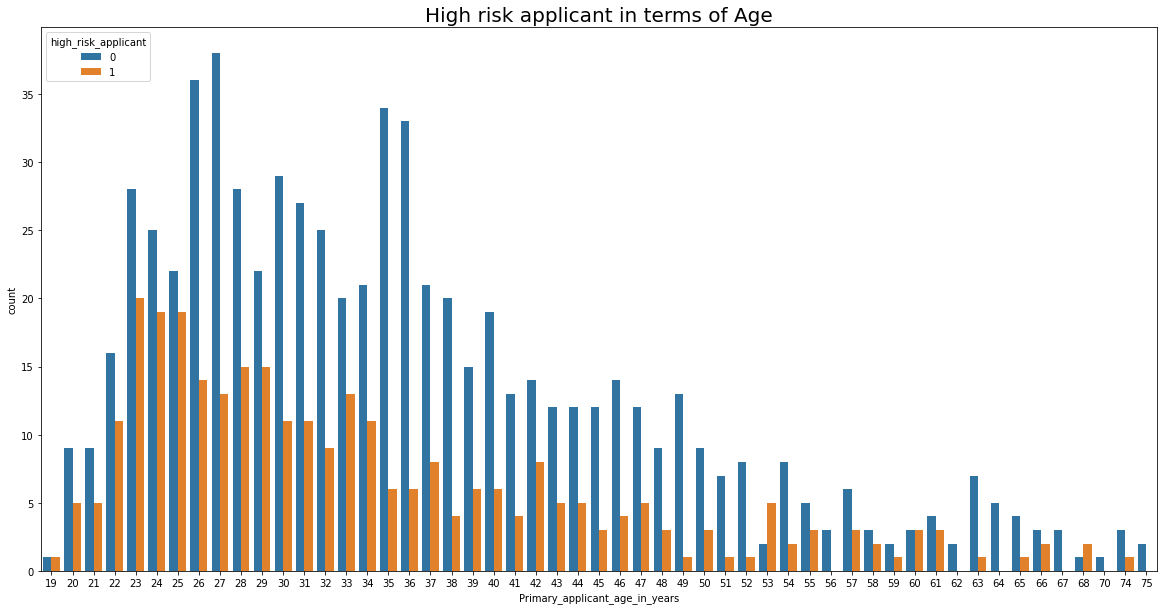

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x='Primary_applicant_age_in_years', hue='high_risk_applicant', data=df)
plt.title('High risk applicant in terms of Age', fontsize=20)

Lets see in box plot


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


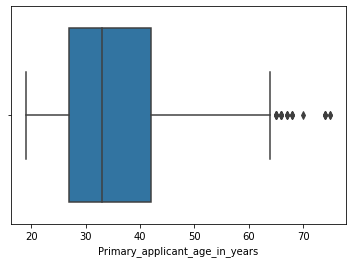

In [ ]:
sns.boxplot(df['Primary_applicant_age_in_years'])

Observation - 

*   We can observe that applicants between the ages of 25 and 40 are more likely to be high risk, indicating that young individuals are smart enough to cheat.
*   The boxplot shows that there are outliers in the data.

##Let's look at the Employment status column to see what type of individuals are high risk applicants

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'High risk appplicant in terms of Employment status')

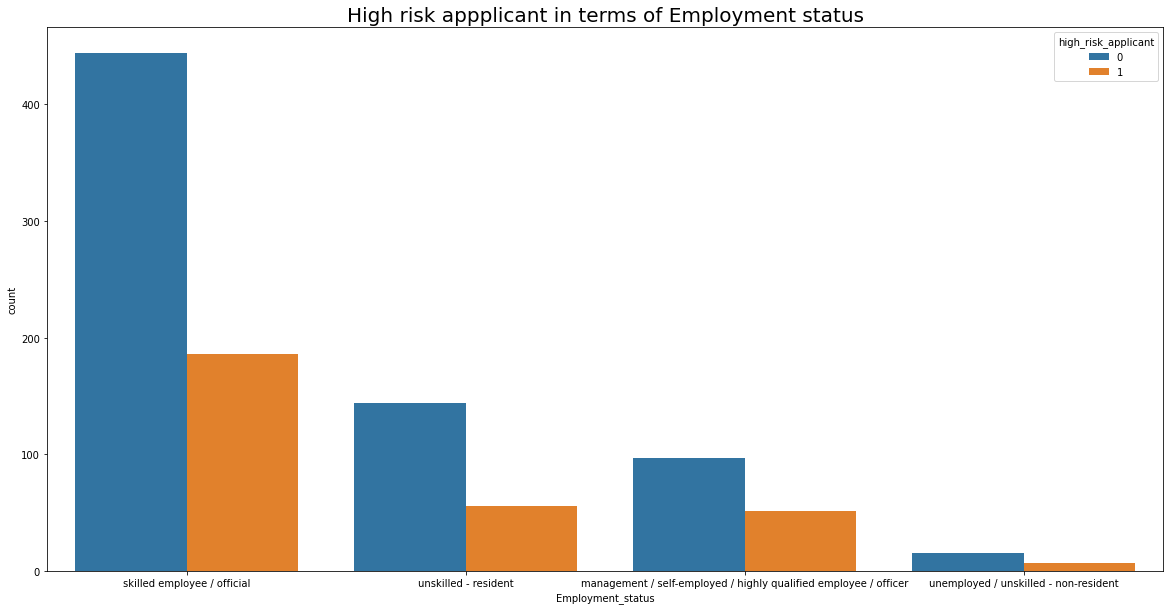

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(df['Employment_status'], hue=df['high_risk_applicant'])
plt.title('High risk appplicant in terms of Employment status', fontsize = 20)

Observation -

We observe that the majority of High risk applicants are skilled workers.

##Years of Experience Vs High risk Applicant

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'High risk appplicant in terms of employment')

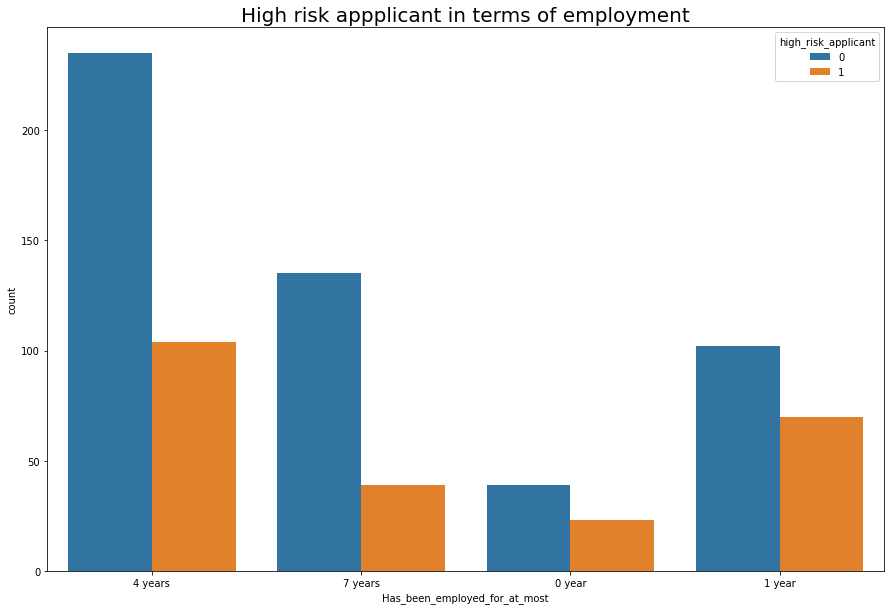

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df['Has_been_employed_for_at_most'], hue=df['high_risk_applicant'])
plt.title('High risk appplicant in terms of employment', fontsize = 20)

Observation -

We can observe that those with 1 - 4 years of experience can be considered high risk applicants.

##Account Balance Vs High Risk Applicants

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'High risk appplicant in terms of Bank Balance')

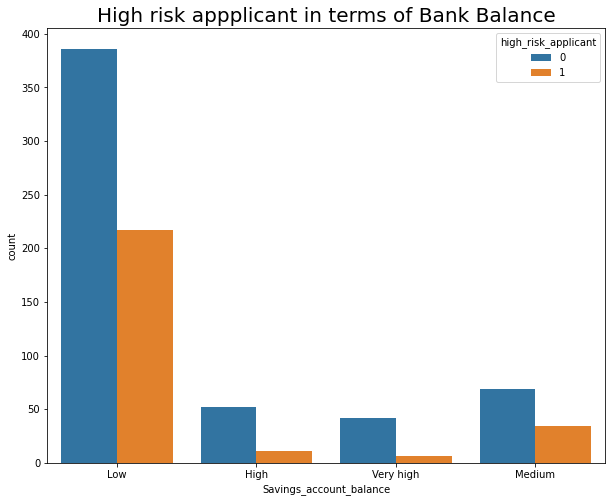

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(df['Savings_account_balance'], hue=df['high_risk_applicant'])
plt.title('High risk appplicant in terms of Bank Balance', fontsize = 20)

Observation -

Individuals with low balance are more likely to be high risk applicants.

##Analysing high risk appplicant in terms of Number of existing loans at this bank

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'High risk appplicant in terms of Number of existing loans at this bank ')

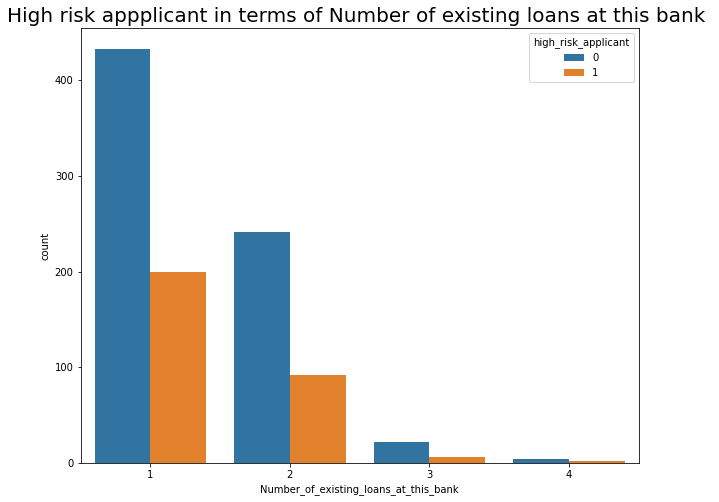

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(df['Number_of_existing_loans_at_this_bank'], hue=df['high_risk_applicant'])
plt.title('High risk appplicant in terms of Number of existing loans at this bank ', fontsize = 20)

Observation -

Loans with less than two appear to be high risk applicants.

##Analysing high risk applicant in terms of Months loan taken

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'High risk applicant in terms of Loan History')

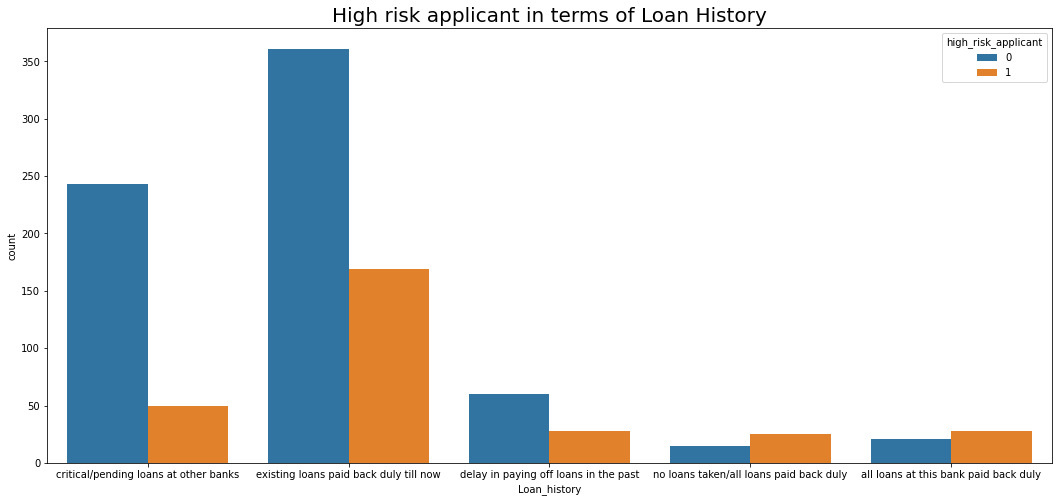

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(df['Loan_history'], hue=df['high_risk_applicant'])
plt.title('High risk applicant in terms of Loan History', fontsize = 20)

Observation - 

We can see that individuals who pay accurately are high risk applicants, implying that they will pay correctly for a few days and then cheat.

##Analysing High risk appplicant in terms of Months loan taken

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'High risk appplicant in terms of Months loan taken')

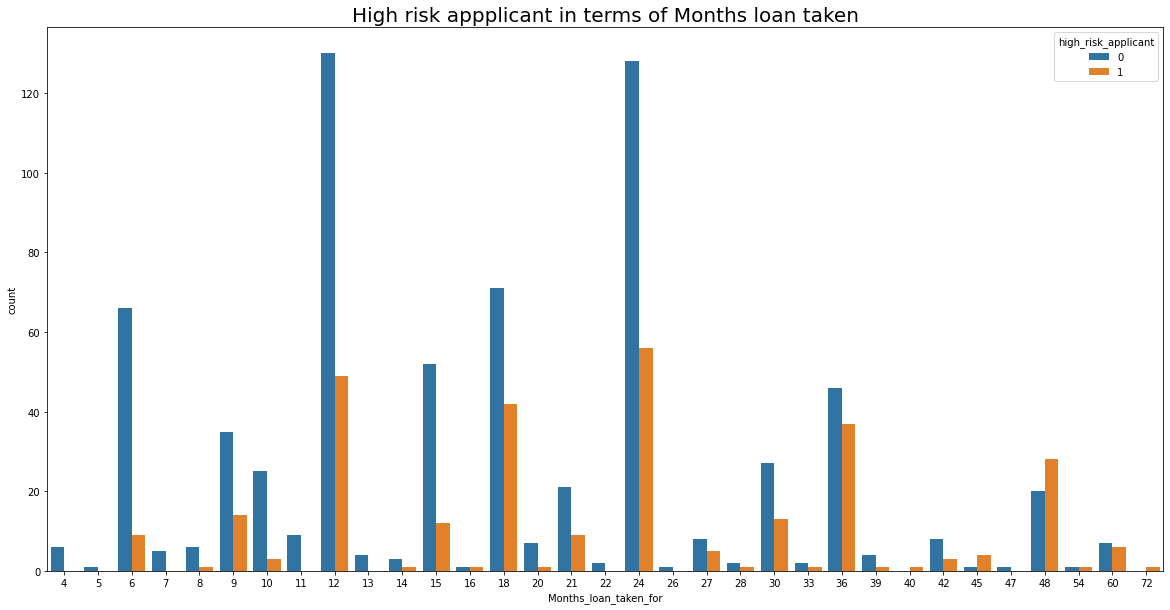

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(df['Months_loan_taken_for'], hue=df['high_risk_applicant'])
plt.title('High risk appplicant in terms of Months loan taken', fontsize = 20)



Observation -

Applicants who are approved for 12 months, 24 months, or 36 months are considered high risk.

##High risk appplicant in terms of EMI rate in percentage of disposable income

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'High risk appplicant in terms of EMI rate in percentage of disposable income')

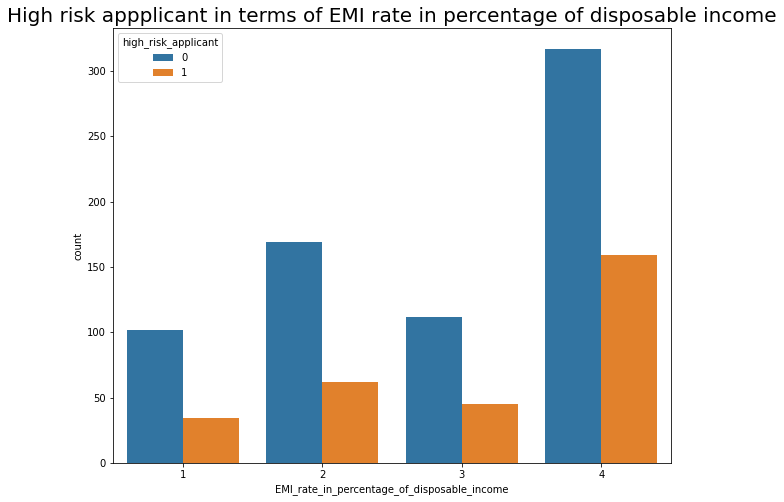

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(df['EMI_rate_in_percentage_of_disposable_income'], hue=df['high_risk_applicant'])
plt.title('High risk appplicant in terms of EMI rate in percentage of disposable income', fontsize = 20)


Observation -

Applicants with a high EMI rate of percentage are more likely to be labelled high risk.

##Can we label applicants as high risk in terms of other EMI plans?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'High risk appplicant in terms of Other EMI plans')

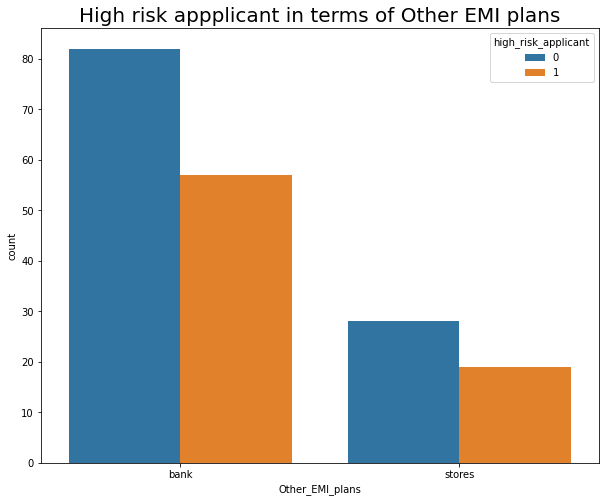

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(df['Other_EMI_plans'], hue=df['high_risk_applicant'])
plt.title('High risk appplicant in terms of Other EMI plans', fontsize = 20)

Observation -

Banks have more high-risk applicants than stores.

Key points:


*   There are more male applicants. Majority of high risk applicants are also male candidates.
* We observed that applicants between the ages of 25 and 40 are more likely to be high risk, indicating that young individuals are smart enough to cheat. data.
*   Majority of High risk applicants are skilled workers with 1 - 4 years of experience.
*   Individuals with low balance are more likely to be high risk applicants.
*   Loans with less than two appear to be high risk applicants.
*   We can see that individuals who pay accurately are high risk applicants, implying that they will pay correctly for a few days and then cheat.
*   Applicants who are approved for 12 months, 24 months, or 36 months are considered high risk.
*   Applicants with a high EMI rate of percentage are more likely to be labelled high risk.
*   Banks have more high-risk applicants than stores.



